# Задание 5

<div style="text-align: right"> 
    
    Домашнее задание V до 19/03/21 
    
    Широков Александр, ПМ-1701
    
    improfeo@yandex.ru
</div> 

## 1.

Множество положительных целых чисел задано списком `[a1, a2, a3, ..., an]`. Написать функцию `halves :: [Integer] -> Maybe ([Integer], [Integer])`, которая разбивает это множество на два подмножества с равной суммой элементов. Если такое разделение невозможно, то функция должна выдавать значение `Nothing`. 

Максимальная длина списка, при которой функция должна выдавать результат за приемлемое время - `22` элемента.

**Решение**:

Будем использовать `compete Greedy` алгоритм:

1. Сортируем списк в порядке убывания
2. Данный алгоритм исследует бинарное дерево, где каждому уровень - число из сортированного мультимножества, в каждой вершине - ветвление. В левой ветке - кладем в группу с наименьшей суммой, а в правой ветке - с наибольшей.

Правила, позволяющие сократить размер нашего дерева:

    2.1 Если сумма чисел в подмножествах равна, то мы кладем число только в одно подмножество
    2.2 Если оставшиеся распределенные числа не превосходят разницу между подмножествами, то мы кладем эти числа в группу с наименьшей суммой

In [1]:
 -- сортировка обычная
quicksort :: Ord a => [a] -> [a]
quicksort list = quicksort' list []
    where
        quicksort' [] list = list
        quicksort' (x:xs) list = quicksort' (filter (< x) xs) $
                             x : quicksort' (filter (>= x) xs) list

In [290]:
-- для вывода ответа в виде кортежа из двуз списков
tuplify2 :: (Bool, [Integer], [Integer]) -> ([Integer], [Integer])
tuplify2 (x, y, z) = (y, z)

-- это основной алгоритм
fun' :: Integer -> Integer -> [Integer] -> [Integer] -> [Integer] -> [(Bool, [Integer], [Integer])]
fun' l r (x:ls) g1 g2  | null ls = if (min l r + x) == max l r then fun'' else [(False, g1, g2)] -- проверка на листовую вершину и равенство сумм
                       | abs (l - r) > sum (x:ls) = if min l r + sum(x:ls) == max l r then fun'' else [(False, g1, g2)] -- проверка условия (2.2)
                       | l == r = fun' (l+x) r ls (x:g1) g2 -- проверка условия (2.1)
                       | otherwise  = fun' (l+x) r ls (x:g1) g2 ++ fun' l (r+x) ls g1 (x:g2) -- построение обоих веток дерева
                       where fun'' = if min l r == l then [(True, x:g1, g2)] else [(True, g1, x:g2)] -- дополнительная функция для вывода верного ответа
                            
-- это основная функция
halves :: [Integer] -> Maybe ([Integer], [Integer])
halves list | null res = Nothing
            | otherwise = Just (tuplify2 (head res)) -- вывод результатов
            where res = filter (\(xe, i1, i2) -> xe) (fun' (head sorted) 0 (tail sorted) [head sorted] []) -- проверяю на наличие True
                  sorted = reverse $ quicksort list -- сортирую исходный список в обратном порядке

Такая структура нахождения ответов программой.

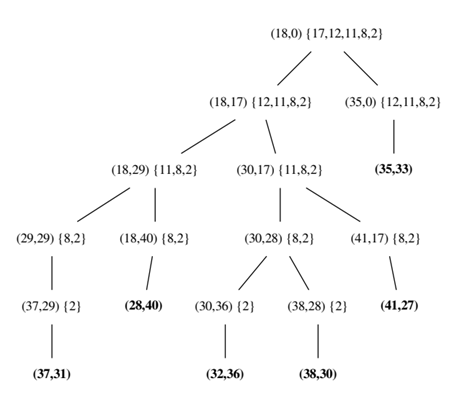

Проверка: 

In [284]:
let list = [12, 17, 11, 8, 18, 14]
halves list

Just ([8,14,18],[11,12,17])

In [285]:
let list = [12, 17, 11, 8, 18, 2]
halves list

Nothing

In [286]:
let list = [4465, 4448, 3719, 3402, 3396, 3168,
            2576, 2351, 2191, 1679, 250, 4775, 
            4431, 3573, 3356, 3187, 2952, 2930, 
            1907, 1555, 1205, 1009, 446, 273, 46]
let res = halves list
res

Just ([250,446,2351,3187,3573,3719,4431,4448,4465,4775],[46,273,1009,1205,1555,1679,1907,2191,2576,2930,2952,3168,3356,3396,3402])

In [287]:
import Data.Maybe
let u = fromJust res
u

([250,446,2351,3187,3573,3719,4431,4448,4465,4775],[46,273,1009,1205,1555,1679,1907,2191,2576,2930,2952,3168,3356,3396,3402])

In [288]:
sum (fst u)

31645

In [289]:
sum (snd u)

31645

## 2.

In [7]:
fact n = foldl(*) 1 [1..n]

Line 1: Use product
Found:
foldl (*) 1
Why not:
product

2.	Прямоугольная матрица типа `[[Integer]]` содержит натуральные числа. Написать функцию `maze :: [[Integer]] -> Maybe [(Int,Int)]`, которая находит путь `[(0,0),...,(n-1,m-1)]` в матрице от левого верхнего угла (элемента с индексами `(0,0)`) в правый нижний угол (элемент с индексами `(n-1,m-1)`, где `n` и `m`  - размеры матрицы) такой, что переход всегда происходит от клетки с индексами `(i,j)` либо в клетку `(i+1,j)`, либо в клетку с индексами `(i,j+1)`, причем переход из клетки в клетку возможен, только если значение элемента матрицы в первой клетке не меньше, чем во второй. 

Если пути с заданными свойствами не существует, функция должна выдавать `Nothing`. 

*“Физическая” интерпретация задания*: прямоугольное поле покрыто квадратными столбиками заданной высоты. Требуется определить, можно ли прокатить шарик по вершинам столбиков из одного угла поля в противоположный, двигаясь только в двух из возможных направлений в сторону цели. 

Например:
```haskell
maze [[5,4]
      [6,2]]
```

должен выдать (*единственно возможный*) путь `Just [(0,0),(0,1),(1,1)]`. 

Минимальный размер матрицы, при котором алгоритм должен завершать работу за приемлемое время - `12x12`. Впрочем, хороший алгоритм легко справится и с матрицей `30х30`.

In [1]:
solve labirint l not_available_cells current_way
                | null l = [] -- проверка на перепробванные все пути - если не удалось найти маршрут
                | head l /= (length labirint-1, length labirint-1) = solve labirint 
                                                                    (tail l++neighbors)
                                                                    (not_available_cells++[head l]) -- добавляем в список посещенных ячеек
                                                                    (current_way++[((a,b), head l) | (a,b) <- neighbors]) -- текущий маршрут
                
                | otherwise = result (head l) current_way [] -- строим маршрут
                where neighbors = uncurry n_neigbors (head l) not_available_cells

                      n_neigbors x y not_available_cells = filter (\(i, j) -> (getNode x y >= getNode i j) && -- значение в текущей ячейке не меньше значения ячейки, в которую мы собираемся пойти
                                                                       notElem (i, j) not_available_cells) -- ячейка не была использована
                                                                       [(x+a, y+b) | (a,b) <- [(1,0), (0,1)]] -- ячейка находится снизу | справа

                      getNode x y = if could_be_next_cell x y labirint then Just ((labirint !! x) !! y) else Nothing -- забираем значения в матрице если значения валидное, иначе - Nothing

                      could_be_next_cell x y labirint = (x >= 0) && -- проверка на правильность соседа
                                                        (y >= 0) && -- (находится ли внутри матрицы)
                                                        length labirint > y && 
                                                        length (head labirint) > x

                      result (i,j) current_way route -- построение маршрута из точки достижения в начальную точку
                                  | not (null points) = result (head points) current_way (route++[(i,j)])
                                  | otherwise = route++[(i,j)]
                                  where points = [(x,y) | ((a, b), (x, y)) <- current_way, (a,b) == (i,j)]

-- это основная функция
maze :: [[Integer]] -> Maybe [(Int,Int)]
maze lab | null res = Nothing -- не удалось найти маршрут
         | otherwise = Just (reverse res) -- удалось
         where res = solve lab [(0, 0)] [] []

In [6]:
maze1 = [[5,4], 
        [6,2]]

maze2 = [[12, 11, 10, 9, 8, 7, 6, 5, 4, 6, 5, 4], 
        [6, 6, 2, 2, 2, 2, 2, 2, 3, 6, 5, 4], 
        [7, 2, 0, 0, 0, 0, 0, 0, 2, 6, 5, 4], 
        [0, 2, 2, 2, 0, 2, 2, 2, 1, 6, 5, 4], 
        [0, 0, 0, 2, 0, 2, 0, 1, 0, 6, 5, 4], 
        [0, 2, 2, 2, 2, 2, 2, 1, -1, 6, 5, 4], 
        [0, 2, 0, 0, 0, 2, 0, 1, 0, 6, 5, 4], 
        [0, 2, 2, 2, 2, 2, 0, 2, 0, 6, 5, 4], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5, 4], 
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5, 4], 
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4], 
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]
        
maze3 = [[5,6], 
        [6,2]]

In [7]:
maze maze1

Just [(0,0),(0,1),(1,1)]

In [8]:
maze maze2

Just [(0,0),(1,0),(1,1),(2,1),(3,1),(3,2),(3,3),(4,3),(5,3),(5,4),(5,5),(6,5),(7,5),(8,5),(9,5),(9,6),(9,7),(9,8),(10,8),(10,9),(10,10),(11,10),(11,11)]

In [9]:
maze maze3

Nothing